In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
covid_data = pd.read_csv('covid_cleaned.csv')
X = DataFrame(covid_data, columns=['cdc_case_earliest_dt '])
y = DataFrame(covid_data, columns=['death_yn'])

In [4]:
test = []
for index, k in X.iterrows():
    #print(k['cdc_case_earliest_dt '])
    hold = str(k['cdc_case_earliest_dt '])
    hold = hold[:4] + hold[5:7] + hold[8:]
    test.append(hold)

In [5]:
test2 = []
for k in test:
    test2.append(k)

In [6]:
covid_data['cdc_case_int'] = test2

In [7]:
#death
test = []
for index, k in y.iterrows():
    hold = k['death_yn']
    if(hold[0] == 'N'): hold = 0
    else: hold = 1
    test.append(hold)

In [8]:
covid_data['die'] = test

In [9]:
from sklearn.cluster import KMeans
import numpy as np

In [27]:
te = []
for t in covid_data['cdc_case_int']:
    te.append([t])
count = 0
for e in covid_data['die']:
    te[count].append(e)
    count = count + 1
ser = np.array(te)

In [43]:
kmeans = KMeans(n_clusters=3, random_state = 11).fit(ser)

In [44]:
pca = PCA(n_components=2, random_state=11).fit(ser)

In [45]:
covid_pca = pca.transform(ser)
covid_pca.shape

(1094551, 2)

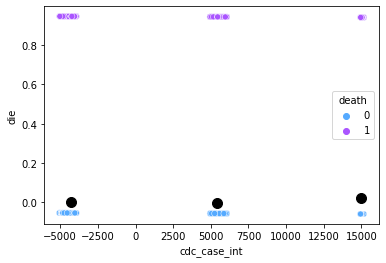

In [46]:
covid_pca_df = pd.DataFrame(covid_pca, columns=['cdc_case_int','die'])
covid_pca_df['death'] = covid_data['die']
axes = sns.scatterplot(data = covid_pca_df, x='cdc_case_int', y='die', hue = 'death', legend = 'brief', palette = 'cool')

covid_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(covid_centers[:,0], covid_centers[:,1],s=100, c='k')